checkout this kaggle kernel: https://www.kaggle.com/kernels/notebooks/new?forkParentScriptVersionId=470167&userName=alexgomes3

In [1]:
#import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Using smaller images (rescaled for 50%)

In [2]:
df_train = pd.read_csv('../input/train_14x14.csv',index_col=0)

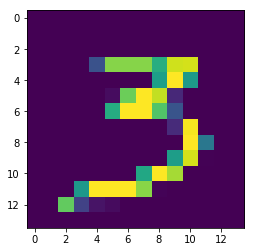

In [3]:
im_index = 5
first_image = df_train.iloc[25,1:].values.reshape(14,14)
plt.imshow(first_image)
plt.show()

# sample with 10k images

In [5]:
sample_1k = df_train.sample(10000)
X, y = sample_1k.drop(columns=['label']), sample_1k.label

X_train_1k, X_test_1k, y_train_1k, y_test_1k = train_test_split(X, y, train_size=0.7)

C:\Users\Alexandre\Anaconda3\envs\ldsa\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Log regression

In [6]:
lr_1k = LogisticRegression()

In [7]:
lr_1k.fit(X_train_1k, y_train_1k)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
#predicting
pred_lr_1k = lr_1k.predict(X_test_1k)
accuracy_score(y_test_1k, pred_lr_1k)

0.8916666666666667

In [30]:
X_sub = pd.read_csv('../input/test_14x14.csv', index_col=0)

In [43]:
df_pred = pd.DataFrame()
df_pred['ImageId'] = np.nan
df_pred['Label'] = lr_1k.predict(X_sub)
df_pred['ImageId'] = df_pred.index+1
df_pred.to_csv('../output/pred_lr_14x14_10k.csv', index=False)

# SVM

In [44]:
svm_1k = SVC(C=0.01)

#training
svm_1k.fit(X_train_1k, y_train_1k)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
#predicting
accuracy_score(y_test_1k, svm_1k.predict(X_test_1k))

0.118

# KNN

In [46]:
knn_1k = KMeans(n_clusters=10)

#training
knn_1k.fit(X_train_1k, y_train_1k)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [47]:
#predicting
accuracy_score(y_test_1k, knn_1k.predict(X_test_1k))

0.058666666666666666

# sample with 5k images

In [4]:
sample_5k = df_train.sample(5000)
X, y = sample_5k.drop(columns=['label']), sample_5k.label

X_train_5k, X_test_5k, y_train_5k, y_test_5k = train_test_split(X, y, train_size=0.7)

C:\Users\Alexandre\Anaconda3\envs\ldsa\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [7]:
X_train_5k.shape

(3500, 196)

# Log regression

In [5]:
lr_5k = LogisticRegression()

In [6]:
lr_5k.fit(X_train_5k, y_train_5k)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
#predicting
accuracy_score(y_test_5k, lr_5k.predict(X_test_5k))

0.8446666666666667

# SVM

In [52]:
svm_5k = SVC(C=0.01)

#training
svm_5k.fit(X_train_5k, y_train_5k)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
#predicting
accuracy_score(y_test_5k, svm_5k.predict(X_test_5k))

0.11866666666666667

# KNN

In [54]:
knn_5k = KMeans(n_clusters=10)

#training
knn_5k.fit(X_train_5k, y_train_5k)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [55]:
#predicting
accuracy_score(y_test_5k, knn_5k.predict(X_test_5k))

0.2613333333333333